# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [9]:
print(cities)

['qaanaaq', 'guelengdeng', 'east london', 'rikitea', 'wamba', 'kodiak', 'kupang', 'morros', 'aykhal', 'rawannawi', 'atuona', 'ixtapa', 'najran', 'jamestown', 'hobart', 'ushuaia', 'carnarvon', 'tasiilaq', 'albany', 'mogok', 'hermanus', 'puerto escondido', 'padang', 'bandarbeyla', 'tilichiki', 'busselton', 'kapaa', 'tuktoyaktuk', 'hilo', 'rio bueno', 'gorontalo', 'bull savanna', 'formoso do araguaia', 'ulladulla', 'hithadhoo', 'balkhash', 'nemuro', 'mabaruma', 'beringovskiy', 'weyburn', 'kuche', 'uribia', 'naantali', 'puerto ayora', 'fayaoue', 'hamilton', 'cape town', 'severo-kurilsk', 'salalah', 'caxito', 'chifeng', 'jamame', 'norman wells', 'bluff', 'mar del plata', 'puerto leguizamo', 'hasaki', 'cotonou', 'kulunda', 'sovetskiy', 'kalevala', 'rio grande', 'punta arenas', 'kavieng', 'tura', 'znamensk', 'new norfolk', 'bara', 'port blair', 'cockburn town', 'bethel', 'bengkulu', 'geraldton', 'nanortalik', 'avarua', 'paamiut', 'chokurdakh', 'romny', 'lebu', 'barrow', 'carauari', 'iqaluit',

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [15]:
import json

# creating api call from a city though url 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# changing the output to json 
print(base_url + f'&q={city}')
req = requests.get(base_url + f'&q={city}')
city_data = req.json()
print(city_data)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ec120b7eb52bd8599c2f86ad562d5e46&q=portland
{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.48, 'feels_like': 53.11, 'temp_min': 50.59, 'temp_max': 57.69, 'pressure': 1016, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 188, 'gust': 5.99}, 'clouds': {'all': 75}, 'dt': 1636146711, 'sys': {'type': 2, 'id': 2008548, 'country': 'US', 'sunrise': 1636124181, 'sunset': 1636159935}, 'timezone': -25200, 'id': 5746545, 'name': 'Portland', 'cod': 200}


{'coord': {'lon': 131.1683, 'lat': 62.6683},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 10.26,
  'feels_like': -0.51,
  'temp_min': 10.26,
  'temp_max': 10.26,
  'pressure': 1030,
  'humidity': 88,
  'sea_level': 1030,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 6.8, 'deg': 113, 'gust': 11.88},
 'clouds': {'all': 86},
 'dt': 1617838484,
 'sys': {'country': 'RU', 'sunrise': 1617826401, 'sunset': 1617877243},
 'timezone': 32400,
 'id': 2026160,
 'name': 'Borogontsy',
 'cod': 200}

In [15]:
# working on iterating through cities with smaller subset

#creating lists for required data 
#weather_dict={"country":[], "max temp":[], "pressure":[], "humidity":[], "wind speed":[], "coordinates":[]}

#for city in cities[0:5]:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    
    #account for errors / passing 
    #try:
       # req= requests.get(base_url + f'&q={city}')
        #print(req)
        
        #city_data = req.json()
        #print(city_data)
        
        #data to dictionary 
        
   # except: 
    #    print(city+ " not found")
        #pass

<Response [200]>
{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.44, 'feels_like': 73.9, 'temp_min': 73.44, 'temp_max': 73.44, 'pressure': 1019, 'humidity': 73, 'sea_level': 1019, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 16.42, 'deg': 125, 'gust': 16.58}, 'clouds': {'all': 96}, 'dt': 1635963963, 'sys': {'country': 'PF', 'sunrise': 1635948775, 'sunset': 1635995634}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
<Response [200]>
{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.63, 'feels_like': 49.68, 'temp_min': 50.63, 'temp_max': 50.63, 'pressure': 1012, 'humidity': 91, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 8281, 'wind': {'speed': 28.36, 'deg': 80, 'gust': 33.15}, 'clouds': {'

In [34]:
#checking parameters
coord = city_data["coord"]
print(coord)

{'lon': -169.9187, 'lat': -19.0595}


In [23]:
#testing updated json data request to trouble shoot every city not found issue
#base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#print(base_url + f'&q={city}')
#req = requests.get(base_url + f'&q={city}')
#city_dat = req.json()
#print(city_dat)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ec120b7eb52bd8599c2f86ad562d5e46&q=alofi
{'coord': {'lon': -169.9187, 'lat': -19.0595}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.49, 'feels_like': 84.34, 'temp_min': 80.49, 'temp_max': 80.49, 'pressure': 1016, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1636057629, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1636043848, 'sunset': 1636090141}, 'timezone': -39600, 'id': 4036284, 'name': 'Alofi', 'cod': 200}


In [16]:
#dictionary lists 
weather_dict = {'city_name': [], 
               'country':[], 
               'max temp':[], 
               'pressure':[], 
               'humidity':[], 
               'wind speed':[], 
               'latitude':[], 
               'longitude':[],
               'cloudiness':[],
               'date':[]}

#loop over cities and adding a counter
for index, city in enumerate(cities, start=1):
    
    
    try: #skip errors
        base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
        req = requests.get(base_url + f'&q={city}')
        city_dat = req.json()
        
        #add data to dictionary 
        weather_dict['city_name'].append(city_dat['name'])
        weather_dict['country'].append(city_dat['sys']['country'])
        weather_dict['max temp'].append(city_dat['main']['temp_max'])
        weather_dict['pressure'].append(city_dat['main']['pressure'])
        weather_dict['humidity'].append(city_dat['main']['humidity'])
        weather_dict['wind speed'].append(city_dat['wind']['speed'])
        weather_dict['latitude'].append(city_dat['coord']['lat'])
        weather_dict['longitude'].append(city_dat['coord']['lon'])
        weather_dict['cloudiness'].append(city_dat['clouds']['all'])
        weather_dict['date'].append(city_dat['dt'])
        
        print("Processing {}: {}".format(index, city))  #formatting the output with a messsage then count then name
        
    except: 
        print("Not found {}: {}".format(index, city))   
        pass

Processing 1: sao joao da barra
Processing 2: porbandar
Processing 3: mehamn
Processing 4: rikitea
Processing 5: ratnagiri
Processing 6: vaini
Processing 7: cherskiy
Processing 8: cayenne
Not found 9: barentsburg
Processing 10: bluff
Processing 11: qaanaaq
Processing 12: chuy
Processing 13: bilibino
Processing 14: albany
Processing 15: punta arenas
Processing 16: nyaunglebin
Not found 17: nizhneyansk
Processing 18: sitka
Processing 19: nikolskoye
Processing 20: kodiak
Processing 21: casablanca
Not found 22: tsihombe
Processing 23: dikson
Processing 24: busselton
Processing 25: hay river
Processing 26: sulangan
Not found 27: tuggurt
Processing 28: namatanai
Processing 29: bengkulu
Processing 30: namibe
Processing 31: mar del plata
Processing 32: hilo
Processing 33: salalah
Not found 34: samusu
Processing 35: canon city
Processing 36: hobart
Processing 37: champerico
Processing 38: petropavlovsk-kamchatskiy
Processing 39: zheleznogorsk
Processing 40: aklavik
Processing 41: yumen
Processi

Processing 330: tabas
Processing 331: kabinda
Processing 332: fukue
Processing 333: caala
Processing 334: orcopampa
Processing 335: appleton
Processing 336: coihaique
Processing 337: barreirinha
Processing 338: winona
Processing 339: kaduna
Processing 340: saint george
Processing 341: kharp
Processing 342: darhan
Processing 343: tura
Processing 344: longyearbyen
Processing 345: carberry
Processing 346: bathsheba
Processing 347: kawalu
Processing 348: angoram
Processing 349: tiznit
Processing 350: kulunda
Processing 351: ahipara
Processing 352: assiniboia
Processing 353: torbay
Processing 354: palu
Processing 355: kapit
Not found 356: tabiauea
Processing 357: sosnovo-ozerskoye
Processing 358: esperance
Processing 359: tromso
Processing 360: port-gentil
Not found 361: makung
Processing 362: cidreira
Processing 363: cortez
Processing 364: lamesa
Processing 365: vestmanna
Processing 366: sambava
Processing 367: broome
Processing 368: vuktyl
Processing 369: tashtyp
Processing 370: brae
Proc

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [17]:
# converting json data into a data frame
weather_df = pd.DataFrame(weather_dict)

# running a count of the data
weather_df.count()

city_name     595
country       595
max temp      595
pressure      595
humidity      595
wind speed    595
latitude      595
longitude     595
cloudiness    595
date          595
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [10]:
# exporting the data into a csv
#weather_df.to_csv("Weather.csv",index=False)  
#save csv to computer to open in excel
weather_df.to_csv(r'C:\Users\chdar\Documents\Homework\wk5_api\Weather.csv')
weather_df.head()

,city_name,country,max temp,pressure,humidity,wind speed,latitude,longitude,cloudiness,date
0,Ushuaia,AR,38.86,1005,81,20.71,-54.8000,-68.3000,75,1636085762
1,Punta Arenas,CL,44.71,1012,57,27.63,-53.1500,-70.9167,0,1636085764
2,Kirillov,RU,40.93,1017,95,7.67,59.8630,38.3813,96,1636085764
3,Esperance,AU,64.26,1013,62,19.53,-33.8667,121.9000,80,1636085764
4,Bela,IN,76.19,1016,48,2.15,25.9333,81.9833,98,1636085765


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

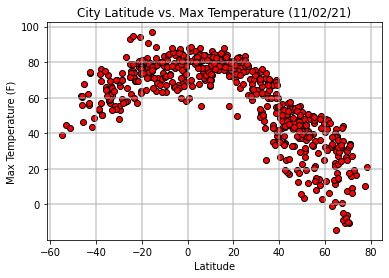

In [15]:
# Latitude vs Teperature scatter plot

fig, ax=plt.subplots()
ax.scatter(weather_df["latitude"], weather_df["max temp"], color = "red", edgecolor = "black")
#add labels 
ax.set_title("City Latitude vs. Max Temperature (11/02/21)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
#add gridelines and adjust transparency
ax.grid(linestyle='-', linewidth=2, alpha=0.5)
#save as png
plt.savefig("City Latitude vs Max Temperature.png")
#show the graph
plt.show()

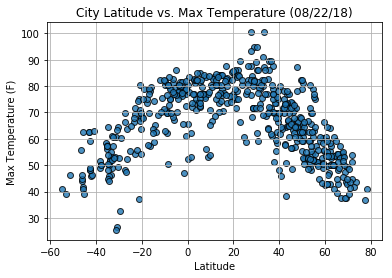

#### Latitude vs. Humidity Plot

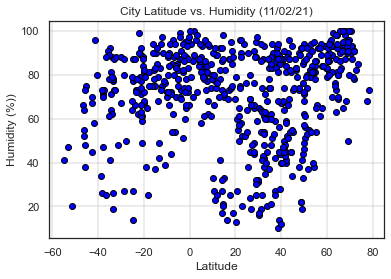

In [21]:
#Latitude vs. Humidity Plot scatter plot
fig, ax=plt.subplots()
ax.scatter(weather_df["latitude"], weather_df["humidity"], color = "blue", edgecolor = "black")
ax.set_title("City Latitude vs. Humidity (11/02/21)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%))")
ax.grid(linestyle='-', linewidth=1.5, alpha=0.5) 
plt.savefig("City Latitude vs Humidity.png")

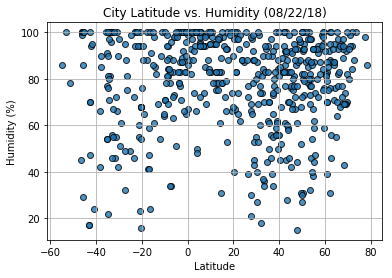

#### Latitude vs. Cloudiness Plot

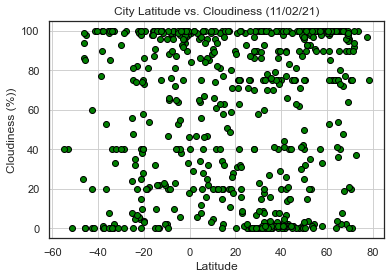

In [22]:
#latitude vs. Cloudiness Plot scatter plot
#plt can be used instead of seting up subplots

plt.scatter(weather_df["latitude"], weather_df["cloudiness"], color = "green", edgecolor = "black") 
plt.title("City Latitude vs. Cloudiness (11/02/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(linestyle='-', linewidth=1, alpha=0.9)
plt.savefig("City Latitude vs Cloudiness.png")

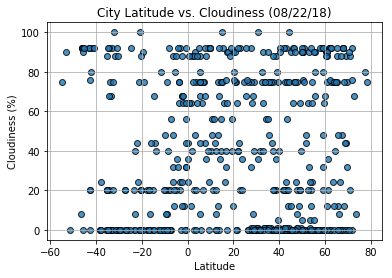

#### Latitude vs. Wind Speed Plot

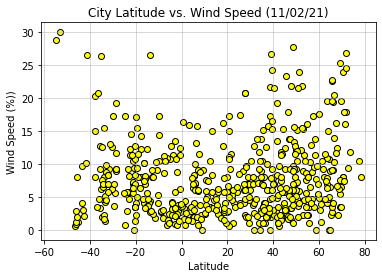

In [80]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_df["latitude"], weather_df["wind speed"], color = "yellow", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (11/02/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs Wind Speed.png")

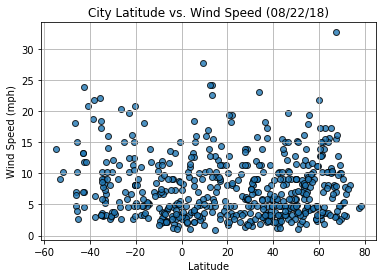

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

In [ ]:
import seaborn as sns

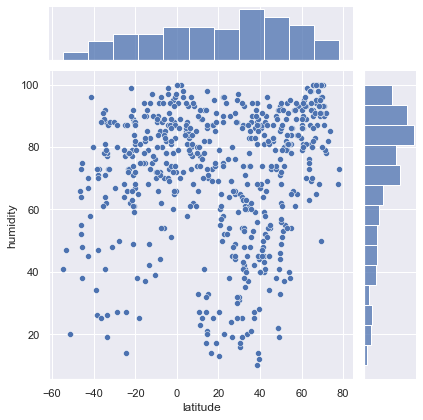

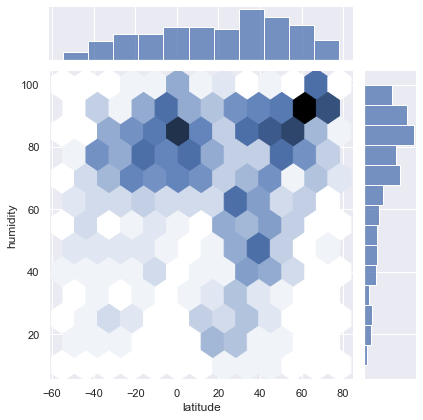

In [49]:
sns.jointplot(x=weather_df["latitude"], y=weather_df["humidity"], kind='scatter')
sns.jointplot(x=weather_df["latitude"], y=weather_df["humidity"], kind='hex')
plt.savefig("City Latitude vs Humidty Joinplot.png")
plt.show()

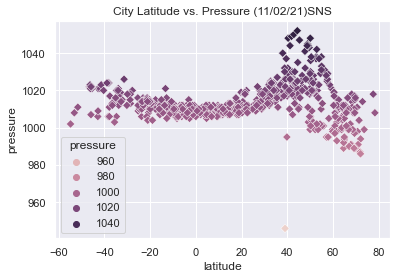

In [38]:
sns.set(style='darkgrid')
sns.scatterplot(x="latitude", y="pressure", hue= "pressure", data= weather_df, marker="D").set_title("City Latitude vs. Pressure (11/02/21)SNS")
plt.savefig("City Latitude vs Pressure2.png")
plt.show()

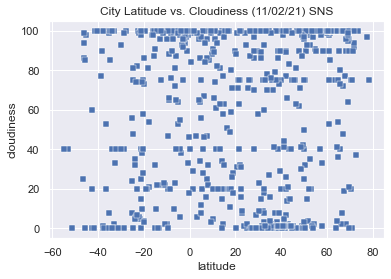

In [72]:
sns.scatterplot(data = weather_df, x ="latitude", y ="cloudiness", marker="s", sizes=(20,500), alpha=1).set_title("City Latitude vs. Cloudiness (11/02/21) SNS")
plt.savefig("City Latitude vs. Cloudiness2.png")
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

1. There is an inverse relationship between Max Temperature and Latitude. As the latitude increases the temp decreases. 
2. The % humidity is more concentrated as the latitude heads east/north (positive), i.e. countries in the north / eastern  hemisphere are more humid right now.
3. The country with the current highest windspeed is located in the south / west latitude (negative)

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

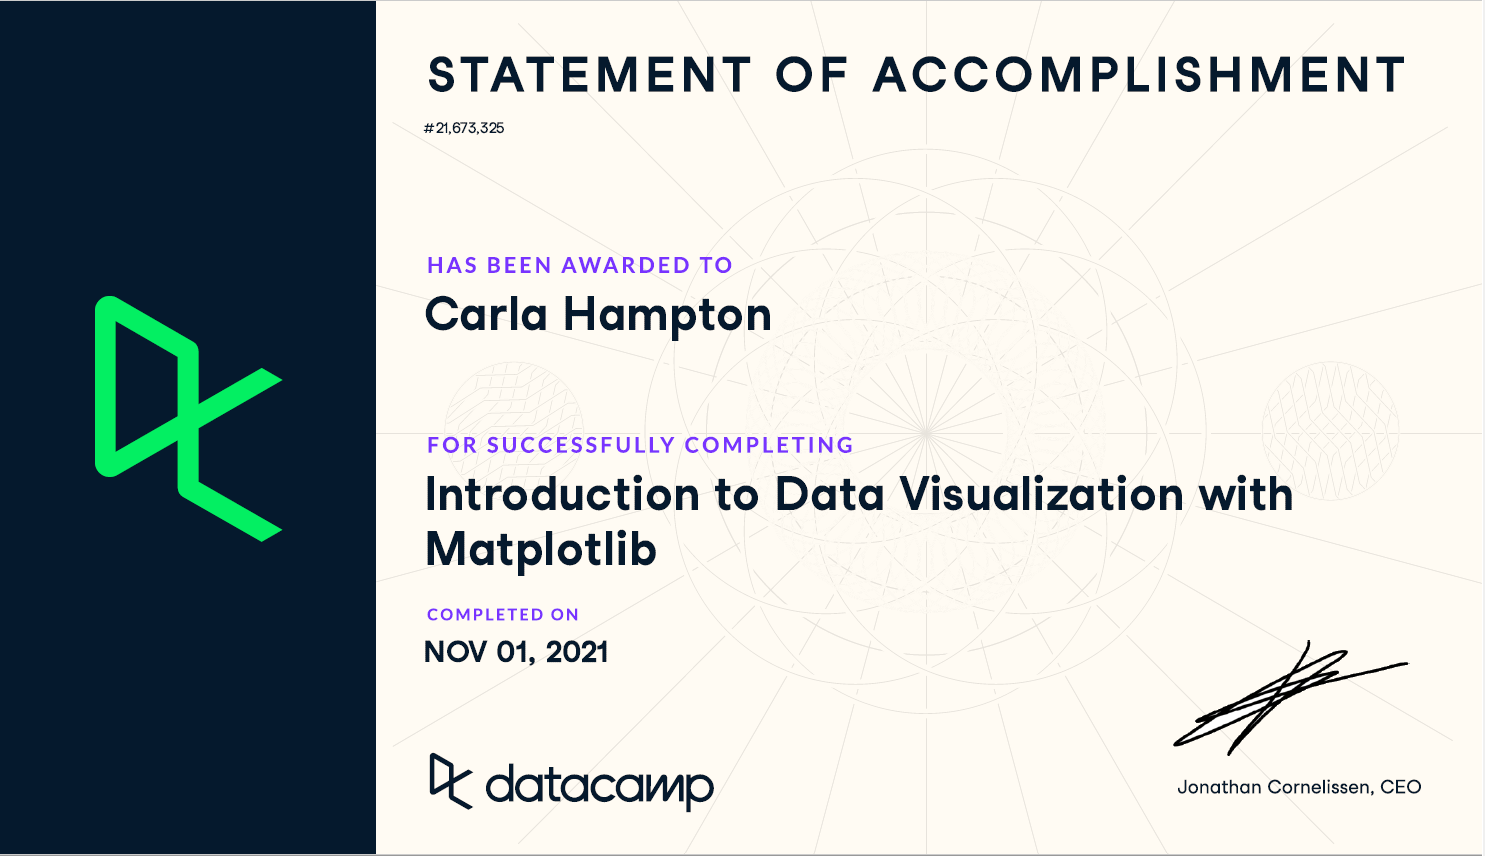

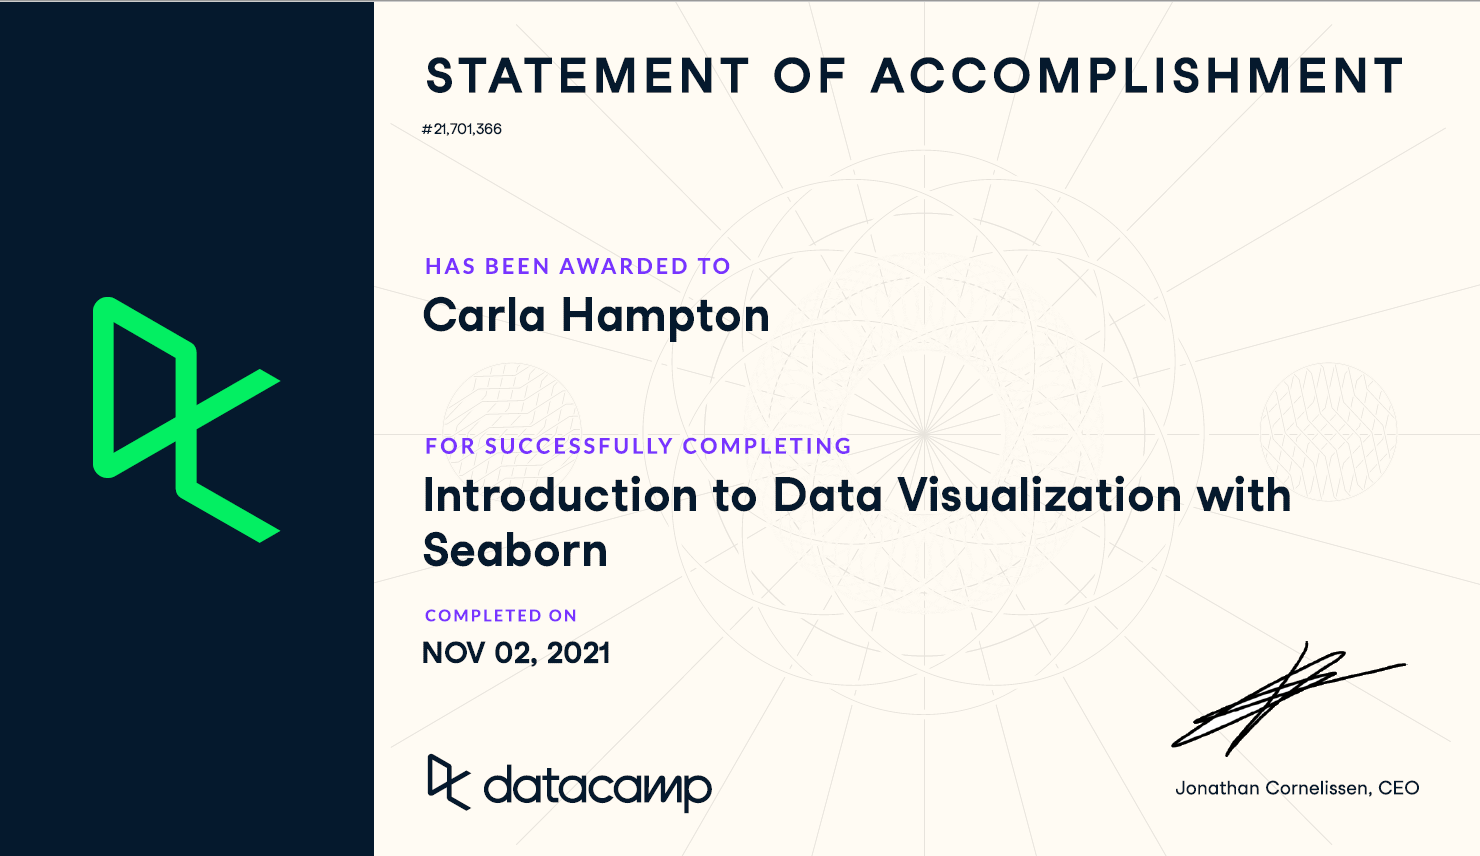